# Unsupervised Classification

In [1]:
import rasterio
import numpy as np

# Load the ALOS-2 composite image using rasterio
# image_path = '/home/jovyan/shared/PCN/ALOS-2/Layerstack/07_10_stacked_output.tif'
image_path = '/home/jovyan/shared/PCN/ALOS-2/Layerstack/07_20_HVstacked_output.tif'

with rasterio.open(image_path) as src:
    image = src.read()  # Read all bands of the composite image
    profile = src.profile  # Metadata for saving later

# Check the shape of the image (bands, height, width)
print(image.shape)


(4, 9000, 9000)


In [2]:
n_bands, height, width = image.shape

# Reshape the image to a 2D array where rows are pixels and columns are bands
reshaped_image = image.reshape(n_bands, height * width).T  # Shape: (pixels, bands)

# Optionally, normalize the pixel values if needed
reshaped_image = reshaped_image / np.max(reshaped_image)  # Scale pixel values between 0 and 1


In [12]:
from sklearn.cluster import KMeans

# Define the number of clusters (6 land cover types)
n_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(reshaped_image)

# Get the cluster labels (land cover types)
classified_image = kmeans.labels_

# Reshape the classified image back to the original dimensions
classified_image = classified_image.reshape(height, width)


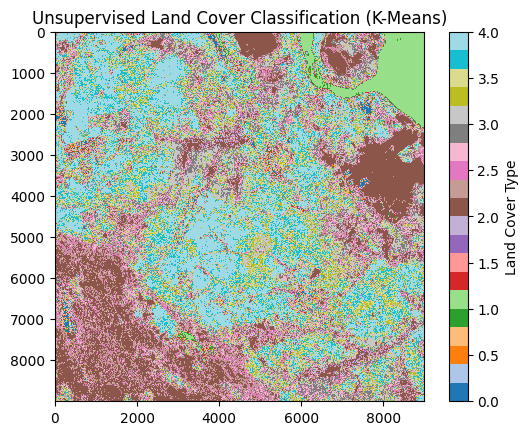

In [13]:
import matplotlib.pyplot as plt

# Plot the classified image
plt.imshow(classified_image, cmap='tab20')  # 'tab20' colormap provides distinct colors for each cluster
plt.title('Unsupervised Land Cover Classification (K-Means)')
plt.colorbar(label='Land Cover Type')
plt.show()


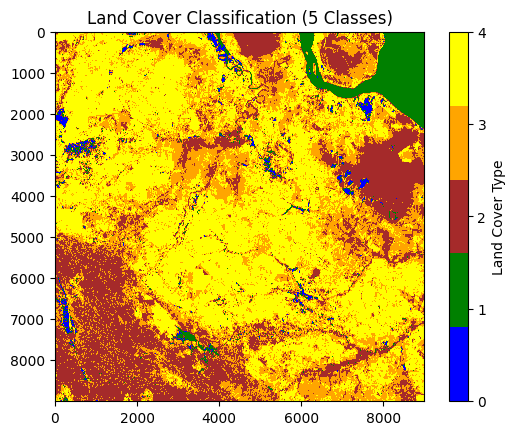

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define 5 colors for the classes (you can adjust these colors as needed)
colors = ['blue', 'green', 'brown', 'orange', 'yellow']
cmap = ListedColormap(colors)

# Plot the classified image with the custom 5-color colormap
plt.imshow(classified_image, cmap=cmap)
plt.title('Land Cover Classification (5 Classes)')
plt.colorbar(ticks=[0, 1, 2, 3, 4, 5], label='Land Cover Type')  # Add ticks for each class
plt.show()



In [8]:
# Update the profile to reflect the classification (single band, integer data type)
classified_profile = profile.copy()
classified_profile.update(dtype=rasterio.uint8, count=1)

# Save the classified image to a GeoTIFF
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/LULC/2007_2020_HV_classified_alos2_image.tif', 'w', **classified_profile) as dst:
    dst.write(classified_image.astype(rasterio.uint8), 1)
